In [1]:
import os
import sys
import warnings

import numpy as np
import pandas as pd
import regex as re
import statsmodels.api as sm
import statsmodels.formula.api as smf
from mizani.formatters import percent_format
from plotnine import *
import ast
import re

warnings.filterwarnings("ignore")


In [2]:
data = pd.read_csv('madrid.csv.gz')

In [3]:
data.shape

(26924, 75)

In [4]:
data.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,2.692400e+04,2.692400e+04,2.692400e+04,26920.000000,26920.000000,26924.000000,26924.000000,26924.000000,21598.000000,24712.000000,...,21026.000000,21026.000000,21027.000000,21024.000000,21023.000000,26924.000000,26924.000000,26924.000000,26924.000000,21068.000000
mean,5.269994e+17,2.024062e+13,2.374991e+08,38.478455,47.226560,40.421619,-3.694061,3.117219,1.306302,1.423559,...,4.688711,4.766106,4.776508,4.759117,4.571829,27.582751,23.773882,3.568118,0.208587,1.891740
std,4.833560e+17,8.031399e+00,1.954564e+08,105.805699,148.764635,0.023563,0.027804,1.918675,0.658710,0.975388,...,0.421409,0.374551,0.402378,0.356827,0.467723,62.142400,60.617192,15.155964,2.136352,1.958487
min,2.185300e+04,2.024062e+13,7.952000e+03,1.000000,1.000000,40.331397,-3.833071,1.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,3.467118e+07,2.024062e+13,4.562144e+07,1.000000,2.000000,40.409340,-3.707540,2.000000,1.000000,1.000000,...,4.590000,4.710000,4.740000,4.670000,4.460000,1.000000,0.000000,0.000000,0.000000,0.410000
50%,6.694947e+17,2.024062e+13,1.988944e+08,3.000000,5.000000,40.420300,-3.701083,2.000000,1.000000,1.000000,...,4.800000,4.870000,4.890000,4.880000,4.670000,3.000000,1.000000,0.000000,0.000000,1.260000
75%,9.942962e+17,2.024062e+13,4.342087e+08,20.000000,26.000000,40.431812,-3.685456,4.000000,1.500000,2.000000,...,4.950000,5.000000,5.000000,4.990000,4.850000,16.000000,8.000000,1.000000,0.000000,2.800000
max,1.178999e+18,2.024062e+13,5.833361e+08,5220.000000,9520.000000,40.535530,-3.545904,16.000000,10.000000,25.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,290.000000,290.000000,166.000000,38.000000,28.070000


In [5]:
print(data.columns)

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [6]:
data.drop(["scrape_id", "source", 'description',  'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about','bathrooms_text',
        'minimum_minimum_nights','maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'license', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications' ], axis=1, inplace=True)
# dropping unneccesaary columns

In [7]:
data['beds'].describe()

count    21565.000000
mean         1.788175
std          1.570993
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         40.000000
Name: beds, dtype: float64

In [8]:
data.shape

(26924, 46)

In [9]:
data["price"] = data["price"].str.replace("$", "")

In [10]:
data["price"] = data["price"].str.replace(",", "").astype("float")

In [11]:
data['price'].describe()

count    21620.000000
mean       137.353932
std        299.097223
min          8.000000
25%         60.000000
50%        100.000000
75%        152.000000
max      21000.000000
Name: price, dtype: float64

In [12]:
data.shape

(26924, 46)

In [13]:
for g in data.columns:
    if "reviews" in g:
        print(g)


number_of_reviews
number_of_reviews_ltm
number_of_reviews_l30d
reviews_per_month


In [14]:
data.room_type.value_counts()


room_type
Entire home/apt    17346
Private room        9103
Shared room          381
Hotel room            94
Name: count, dtype: int64

In [15]:
## Create Numerical variables
#data["usd_price_day"] = data["price"]
#data["p_host_response_rate"] = data["host_response_rate"].astype("float")
data["p_host_response_rate"] = data["host_response_rate"].str.rstrip("%").astype(float)


In [16]:
for column in (
    "accommodates",
    "bathrooms",
    "review_scores_rating",
    "number_of_reviews",
    "reviews_per_month",
    "minimum_nights",
    "beds",
):
    data["n_" + re.sub(r"[^[:alnum:]_]", "", column.lower())] = data[column].astype(
        "float"
    )

In [17]:
data.columns

Index(['id', 'listing_url', 'last_scraped', 'name', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights',
       'maximum_nights', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'calendar_last_scraped', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'reviews_per_month',
       'p_h

In [18]:
data.drop(["accommodates",
    "bathrooms",
    "review_scores_rating",
    "number_of_reviews",
    "reviews_per_month",
    "minimum_nights",
    "beds", ], axis=1, inplace=True)
# dropping those same columns

In [19]:
data["n_days_since"] = pd.to_datetime(
    data["calendar_last_scraped"], format="%Y-%m-%d"
) - pd.to_datetime(data["first_review"], format="%Y-%m-%d")
# Previous row creates a timedelta object in each row. Get the elapsed number of days like:
data["n_days_since"] = [x.days for x in data["n_days_since"]]


In [20]:
data.shape

(26924, 48)

In [21]:
data.isnull().sum().loc[lambda x: x > 0]

host_response_time              4915
host_response_rate              4915
host_acceptance_rate            4017
host_is_superhost                155
host_has_profile_pic               4
host_identity_verified             4
neighbourhood                  13618
bedrooms                        2212
price                           5304
calendar_updated               26924
has_availability                1536
first_review                    5856
last_review                     5856
review_scores_accuracy          5897
review_scores_cleanliness       5898
review_scores_checkin           5898
review_scores_communication     5897
review_scores_location          5900
review_scores_value             5901
p_host_response_rate            4915
n_bathrooms                     5326
n_review_scores_rating          5856
n_reviews_per_month             5856
n_beds                          5359
n_days_since                    5856
dtype: int64

In [22]:
data.drop(["host_response_time",
    "host_response_rate",
    "calendar_updated",
    "neighbourhood",
    "first_review",
 "last_review", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin",         
"review_scores_communication",
"review_scores_location",
"review_scores_value"
  ], axis=1, inplace=True)

In [23]:
data.isnull().sum().loc[lambda x: x > 0]

host_acceptance_rate      4017
host_is_superhost          155
host_has_profile_pic         4
host_identity_verified       4
bedrooms                  2212
price                     5304
has_availability          1536
p_host_response_rate      4915
n_bathrooms               5326
n_review_scores_rating    5856
n_reviews_per_month       5856
n_beds                    5359
n_days_since              5856
dtype: int64

In [24]:
# Convert the amenities column from string representation of lists to actual lists
data['amenities'] = data['amenities'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])

In [25]:
data['amenities'].describe()

count                                             26924
unique                                            23293
top       [Washer, TV, Air conditioning, Kitchen, Wifi]
freq                                                146
Name: amenities, dtype: object

In [26]:
# Convert amenities from string to list
data['amenities'] = data['amenities'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Define category mapping dictionary
category_map = {
    'Internet': r'(wifi|ethernet|pocket wifi|internet)',
    'Kitchen': r'(kitchen|refrigerator|microwave|oven|stove|dishwasher|toaster|coffee maker|cooking basics|dishes)',
    'Laundry': r'(washer|dryer|laundry)',
    'Safety': r'(smoke alarm|fire extinguisher|carbon monoxide alarm|first aid kit|security camera)',
    'Heating_Cooling': r'(air conditioning|heating|central heating|portable fan|ceiling fan)',
    'Essentials': r'(essentials|shampoo|conditioner|body soap|toilet paper|towels|hair dryer)',
    'Parking': r'(parking|garage|driveway|carport)',
    'Entertainment': r'(tv|television|hdtv|netflix|roku|chromecast|sound system)',
    'Workspace': r'(dedicated workspace|desk|office)',
    'Family': r'(crib|high chair|baby safety|toys|children’s books)',
    'Outdoor': r'(patio|balcony|garden|bbq|grill|backyard)',
    'Luxury': r'(hot tub|sauna|pool|gym|concierge)'
}

In [27]:
def categorize_amenity(amenity):
    """Categorize individual amenity into broader groups"""
    # Handle null values and convert to string
    if pd.isna(amenity) or not isinstance(amenity, str):
        return 'Other'
    
    # Clean special characters and normalize
    cleaned = re.sub(r'[^a-zA-Z0-9\s]', '', amenity).lower()
    
    for category, pattern in category_map.items():
        if re.search(pattern, cleaned, re.IGNORECASE):
            return category
    return 'Other'

# Create mapping of all unique amenities to categories (with null handling)
unique_amenities = data['amenities'].explode().dropna().unique()

amenity_category_mapping = {amenity: categorize_amenity(amenity) for amenity in unique_amenities}

In [28]:
# Create category dummy variables
def create_category_dummies(amenities_list):
    categories = set()
    for amenity in amenities_list:
        categories.add(amenity_category_mapping.get(amenity, 'Other'))
    return {category: 1 for category in categories}

# Apply to each row and convert to DataFrame
category_dummies = data['amenities'].apply(create_category_dummies).apply(pd.Series).fillna(0)

# Combine with original data
data = pd.concat([data, category_dummies], axis=1)

# Optional: Remove original amenities column
data.drop('amenities', axis=1, inplace=True)

# Show results
print(data[list(category_map.keys()) + ['Other']].head())

   Internet  Kitchen  Laundry  Safety  Heating_Cooling  Essentials  Parking  \
0       0.0      0.0      0.0     0.0              0.0         0.0      0.0   
1       1.0      0.0      0.0     0.0              0.0         0.0      0.0   
2       1.0      1.0      0.0     1.0              0.0         0.0      1.0   
3       1.0      1.0      0.0     0.0              0.0         0.0      0.0   
4       1.0      1.0      1.0     1.0              1.0         0.0      0.0   

   Entertainment  Workspace  Family  Outdoor  Luxury  Other  
0            0.0        0.0     0.0      0.0     0.0    0.0  
1            0.0        0.0     0.0      0.0     0.0    0.0  
2            1.0        1.0     0.0      0.0     0.0    1.0  
3            0.0        0.0     0.0      0.0     0.0    1.0  
4            0.0        1.0     0.0      0.0     0.0    1.0  


In [29]:
data.columns

Index(['id', 'listing_url', 'last_scraped', 'name', 'host_acceptance_rate',
       'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'bedrooms', 'price',
       'maximum_nights', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'calendar_last_scraped', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'instant_bookable', 'p_host_response_rate',
       'n_accommodates', 'n_bathrooms', 'n_review_scores_rating',
       'n_number_of_reviews', 'n_reviews_per_month', 'n_minimum_nights',
       'n_beds', 'n_days_since', 'Internet', 'Other', 'Entertainment',
       'Kitchen', 'Safety', 'Parking', 'Workspace', 'Heating_Cooling',
       'Laundry', 'Essentials', 'Luxury', 'Outdoor', 'Family'],
      dtype='object')

In [30]:
# with price info only
data = data.dropna(subset=["price"])

In [31]:
data.shape


(21620, 48)

In [32]:
data.isnull().sum().loc[lambda x: x > 0]

host_acceptance_rate       724
host_is_superhost          142
bedrooms                    27
has_availability           102
p_host_response_rate      1199
n_bathrooms                 22
n_review_scores_rating    3849
n_reviews_per_month       3849
n_beds                      55
n_days_since              3849
dtype: int64

In [33]:
for var in ["flag_days_since","flag_review_scores_rating","flag_reviews_per_month"]:
    data[var]=[int(x) for x in data[var.replace('flag','n')].isna()]

In [34]:
data['flag_review_scores_rating'].sum()

3849

In [35]:
data = data.drop(["p_host_response_rate"],axis=1)

In [36]:
data["host_is_superhost"] = data["host_is_superhost"].fillna("0")          
data["has_availability"] = data["has_availability"].fillna("1")

# Remove '%' and convert to float
data["host_acceptance_rate"] = data["host_acceptance_rate"].str.rstrip('%').astype(float)

data["host_acceptance_rate"] = data["host_acceptance_rate"].fillna(np.nanmedian(data["host_acceptance_rate"]))
data["n_review_scores_rating"] = data["n_review_scores_rating"].fillna(np.nanmedian(data["n_review_scores_rating"]))
data["n_reviews_per_month"] = data["n_reviews_per_month"].fillna(np.nanmedian(data["n_reviews_per_month"]))
data["n_days_since"] = data["n_days_since"].fillna(np.nanmedian(data["n_days_since"]))
data["bedrooms"] = data["bedrooms"].fillna(np.nanmedian(data["bedrooms"]))
data["n_bathrooms"] = data["n_bathrooms"].fillna(np.nanmedian(data["n_bathrooms"]))
data["n_beds"] = data["n_beds"].fillna(data["n_accommodates"])


In [37]:
data.isnull().sum().loc[lambda x: x > 0]

Series([], dtype: int64)

In [38]:
print(data["price"].describe())

count    21620.000000
mean       137.353932
std        299.097223
min          8.000000
25%         60.000000
50%        100.000000
75%        152.000000
max      21000.000000
Name: price, dtype: float64


In [39]:
percentile_995 = data["price"].quantile(0.995)
print(percentile_995)

999.0


In [40]:
# Remove extreme values + missing from prices (this case: only 3 missing values)
data = data.loc[data.price < 1071]


In [41]:
data.shape

(21547, 50)

In [42]:
data["ln_price"] = np.log(data.price)

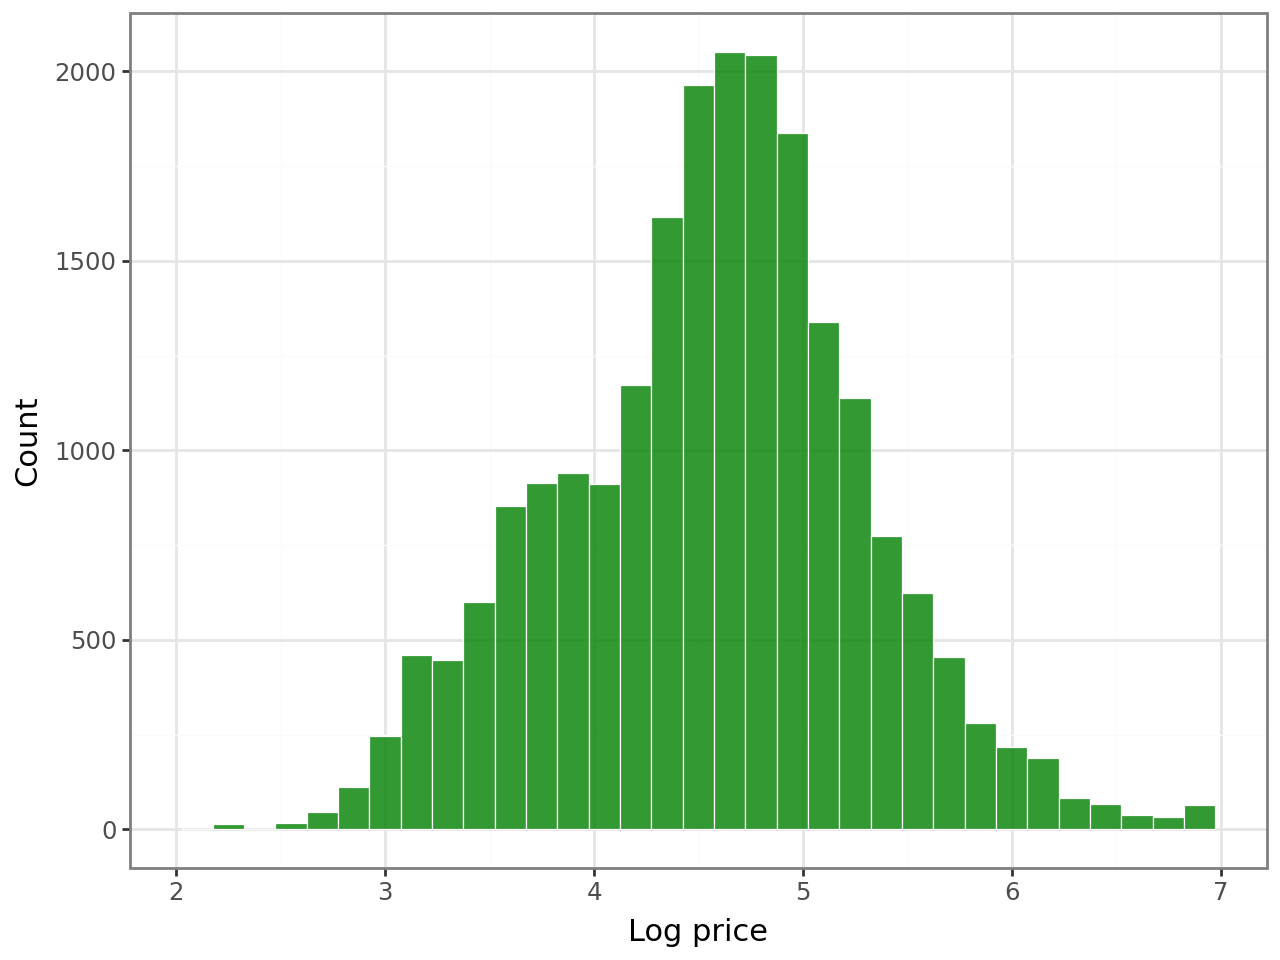

In [43]:
# Histograms
(
    ggplot(data, aes("ln_price"))
    + geom_histogram(
        binwidth=0.15, fill='green', color="white", alpha=0.8, size=0.25, closed="left"
    )
    + ylab("Count")
    + xlab("Log price")
    + theme_bw()
)


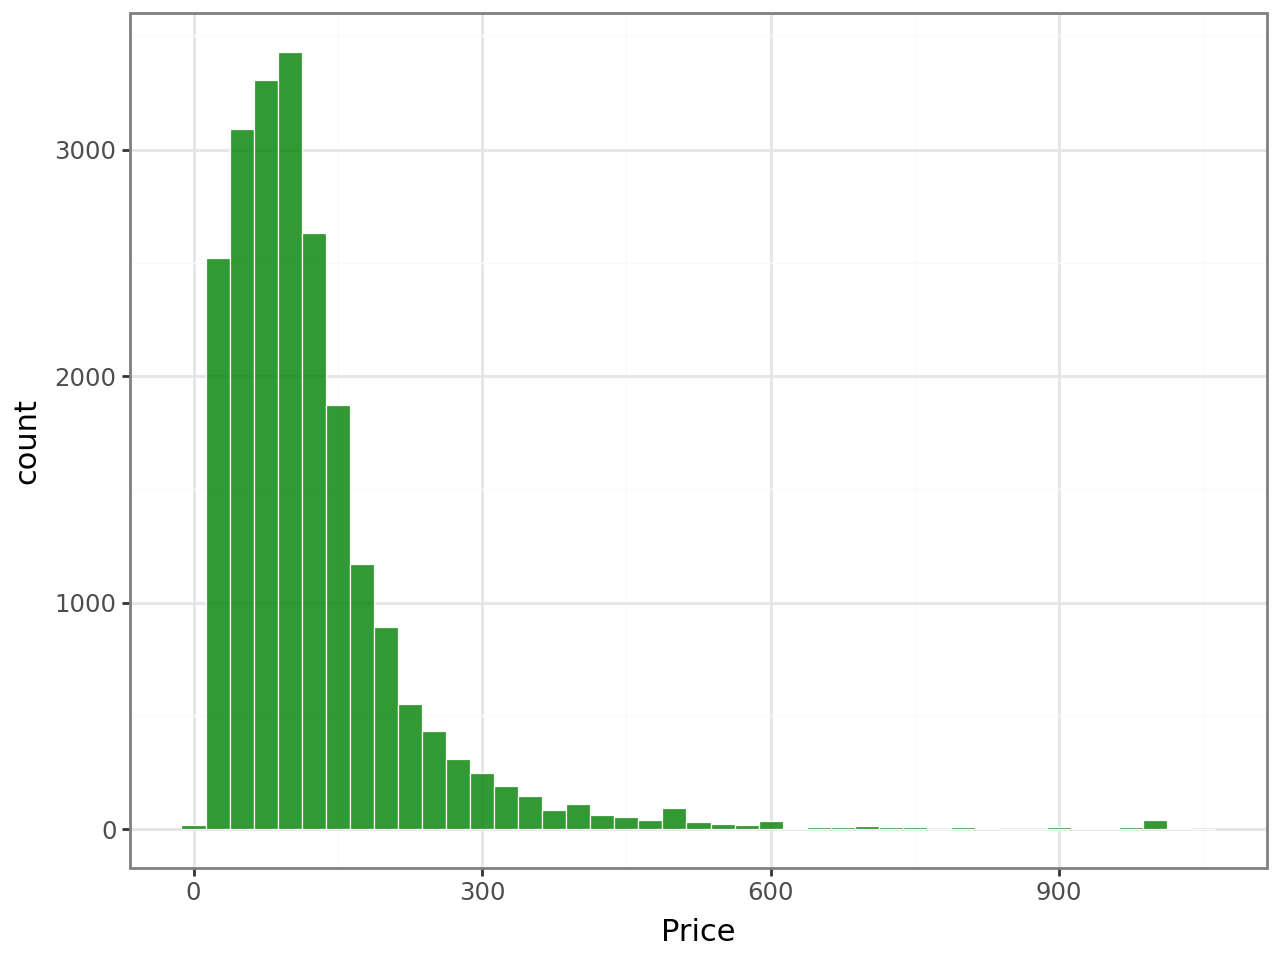

In [44]:
(
    ggplot(data, aes("price"))
    + geom_histogram(
        binwidth=25, fill='green', color="white", alpha=0.8, size=0.25, closed="left"
    )
    + ylab("count")
    + xlab("Price")
    + theme_bw()
)


In [45]:
data.groupby("n_accommodates").agg(
    mean_price=("price", np.mean),
    min_price=("price", np.min),
    max_price=("price", np.max),
    n=("price", "size"),
)


,mean_price,min_price,max_price,n
n_accommodates,,,,
1.0,51.798622,9.0,1001.0,3193
2.0,95.758154,8.0,1031.0,7236
3.0,120.106557,10.0,1020.0,2196
4.0,146.322181,17.0,1000.0,5171
5.0,168.462926,30.0,1050.0,998
6.0,209.751578,10.0,1000.0,1743
7.0,241.480315,48.0,939.0,254
8.0,266.351163,8.0,929.0,430
9.0,275.283582,29.0,700.0,67


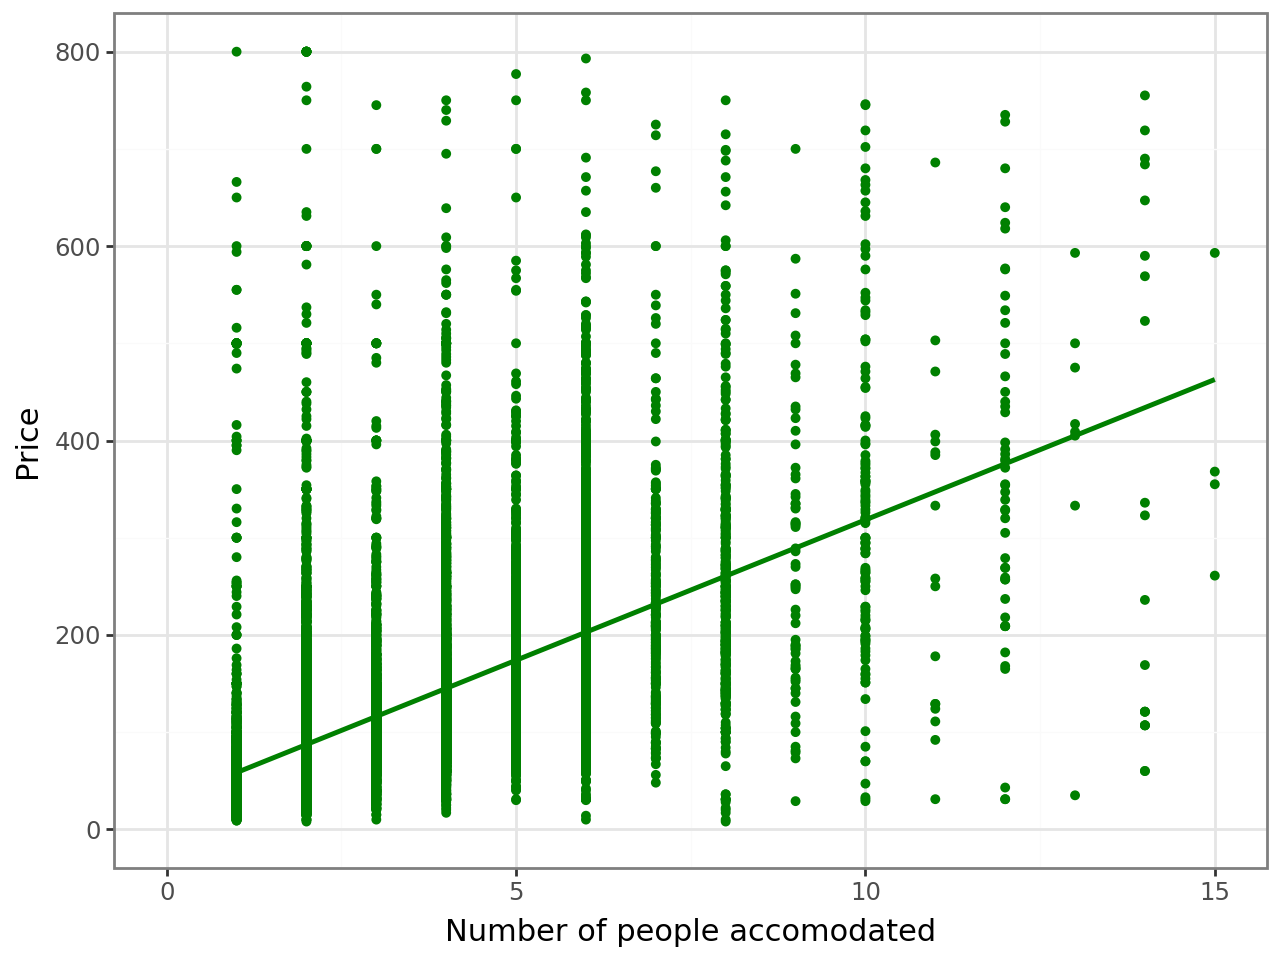

In [46]:
(
    ggplot(data, aes(x="n_accommodates", y="price"))
    + geom_point(size=1, colour='green')
    + ylim(0, 800)
    + xlim(0, 15)
    + labs(x="Number of people accomodated", y="Price")
    + geom_smooth(method="lm", colour='green', se=False)
    + theme_bw()
)


In [47]:
data["n_accommodates2"] = data["n_accommodates"] ** 2
data["ln_accommodates"] = np.log(data["n_accommodates"])
data["ln_accommodates2"] = data["ln_accommodates"] ** 2

In [48]:
# Regression 1: ln price and num of accomodates and squares
smf.ols(
    formula="ln_price ~ n_accommodates + n_accommodates2", data=data
).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     7874.
Date:                Sun, 02 Mar 2025   Prob (F-statistic):               0.00
Time:                        22:41:45   Log-Likelihood:                -17889.
No. Observations:               21547   AIC:                         3.578e+04
Df Residuals:                   21544   BIC:                         3.581e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.4808      0.011    317.982      0.000       3.459       3.502
n_accommodates      0.4287      0.005     84.311      0.000       0.419       0.439
n_accommodates2    -0.0208      0.000    -42.264      0.000      -0.022      -0.020
==============================================================================
Omnibus:                     1848.185   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5098.048
Skew:                           0.481   Prob(JB):                         0.00
Kurtosis:                       5.180   Cond. No.                         77.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
# Regression 2: ln price and log num of accomodates

smf.ols(formula="ln_price ~ ln_accommodates", data=data).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                 1.747e+04
Date:                Sun, 02 Mar 2025   Prob (F-statistic):               0.00
Time:                        22:41:45   Log-Likelihood:                -17403.
No. Observations:               21547   AIC:                         3.481e+04
Df Residuals:                   21545   BIC:                         3.483e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.7379      0.007    514.584      0.000       3.724       3.752
ln_accommodates     0.8286      0.006    132.173      0.000       0.816       0.841
==============================================================================
Omnibus:                     2211.432   Durbin-Watson:                   1.856
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7267.485
Skew:                           0.521   Prob(JB):                         0.00
Kurtosis:                       5.648   Cond. No.                         3.70
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
# Regression 3: ln price and num of accomodates
smf.ols(formula="ln_price ~ n_accommodates", data=data).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                 1.289e+04
Date:                Sun, 02 Mar 2025   Prob (F-statistic):               0.00
Time:                        22:41:45   Log-Likelihood:                -18747.
No. Observations:               21547   AIC:                         3.750e+04
Df Residuals:                   21545   BIC:                         3.751e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.8251      0.008    502.820      0.000       3.810       3.840
n_accommodates     0.2302      0.002    113.545      0.000       0.226       0.234
==============================================================================
Omnibus:                     1168.304   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3906.590
Skew:                           0.202   Prob(JB):                         0.00
Kurtosis:                       5.046   Cond. No.                         7.64
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
data.groupby("n_beds").agg(
    mean_price=("price", np.mean),
    min_price=("price", np.min),
    max_price=("price", np.max),
    n=("price", "size"),
)


,mean_price,min_price,max_price,n
n_beds,,,,
0.0,94.564266,10.0,1026.0,2972
1.0,88.501879,8.0,1031.0,8247
2.0,130.978289,10.0,1050.0,5481
3.0,173.633373,10.0,1000.0,2523
4.0,202.565954,8.0,1000.0,1357
5.0,258.679570,25.0,1000.0,465
6.0,259.608163,13.0,1005.0,245
7.0,338.085366,19.0,818.0,82
8.0,264.671642,17.0,746.0,67


In [52]:
# maybe best is to have log beds
data["ln_beds"] = np.log(data["n_beds"])


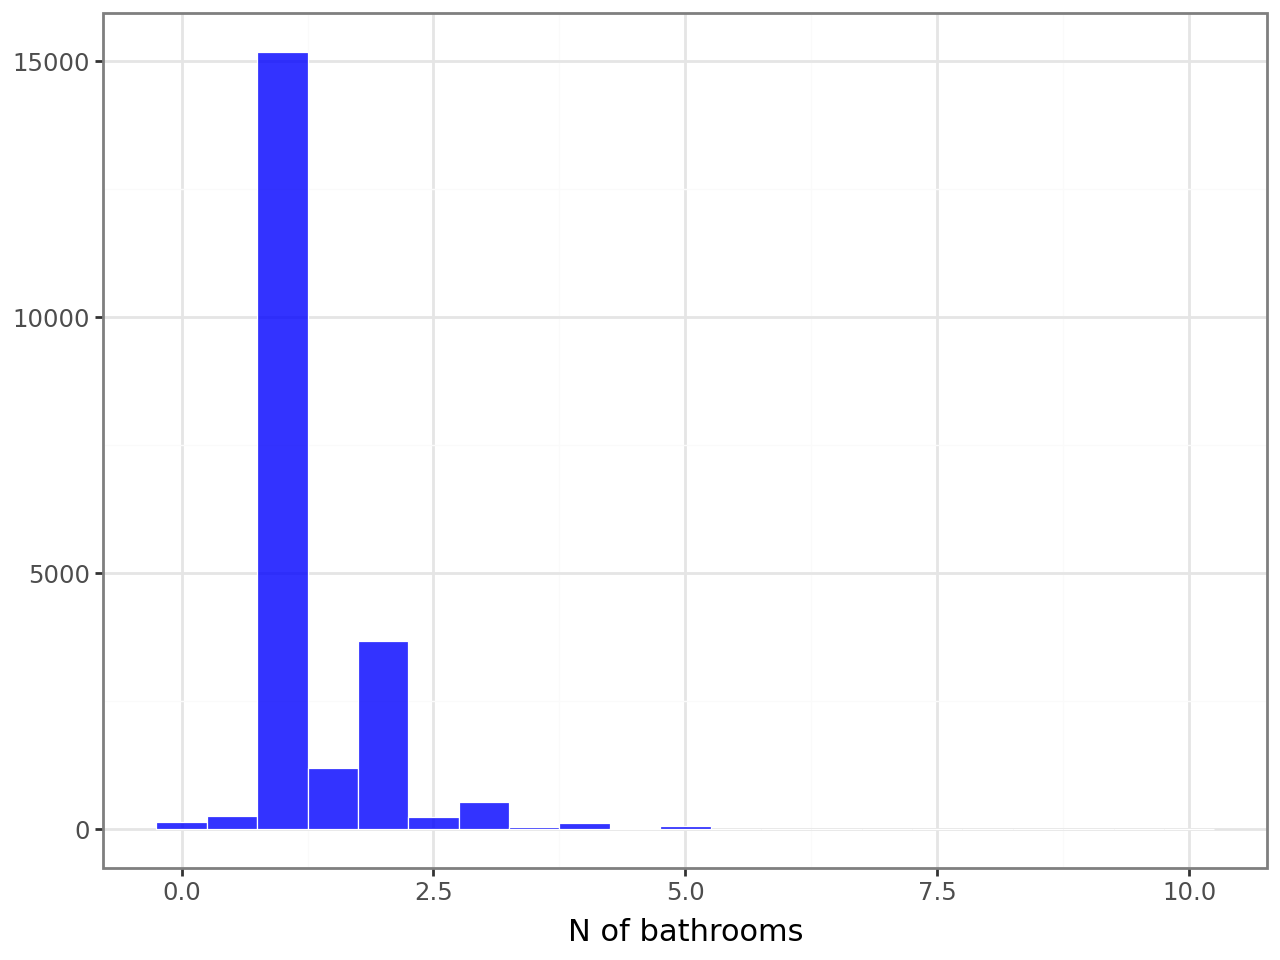

In [53]:
## bathrooms
(
    ggplot(data, aes("n_bathrooms"))
    + geom_histogram(
        binwidth=0.5, closed="left", fill='blue', color="white", alpha=0.8, size=0.25
    )
    + ylab("")
    + xlab("N of bathrooms")
    + theme_bw()
)


In [54]:
bins = [0, 1, 2, 10]
labels = [0, 1, 2]

data['f_bathroom'] = pd.cut(data['n_bathrooms'], bins=bins, labels=labels, right=False)

In [55]:
data["n_bathrooms"].dtype

dtype('float64')

In [56]:
data.groupby("f_bathroom").agg(mean_price=("price", np.mean), n=("price", "size"))

,mean_price,n
f_bathroom,,
0,85.956633,392
1,109.243364,16387
2,184.398993,4767


In [57]:
## Number of reviews
nreview_plot = data.loc[data.n_number_of_reviews < 100]


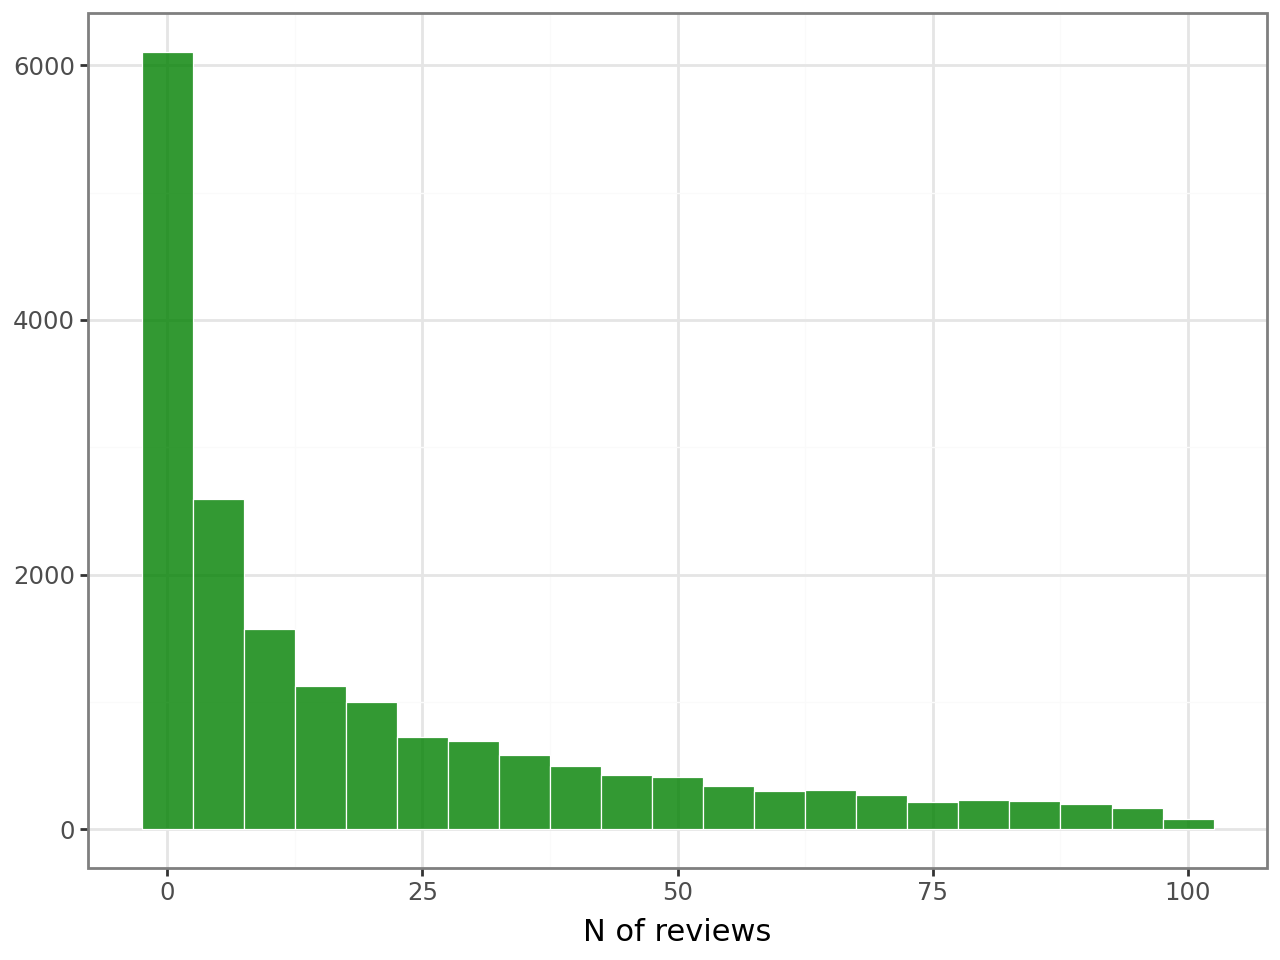

In [58]:
(
    ggplot(nreview_plot, aes("n_number_of_reviews"))
    + geom_histogram(binwidth=5, fill='green', color="white", alpha=0.8, size=0.25)
    + ylab("")
    + xlab("N of reviews")
    + theme_bw()
)


In [59]:
# number of reviews: use logs as well
data["ln_number_of_reviews"] = np.log(data["n_number_of_reviews"] + 1)


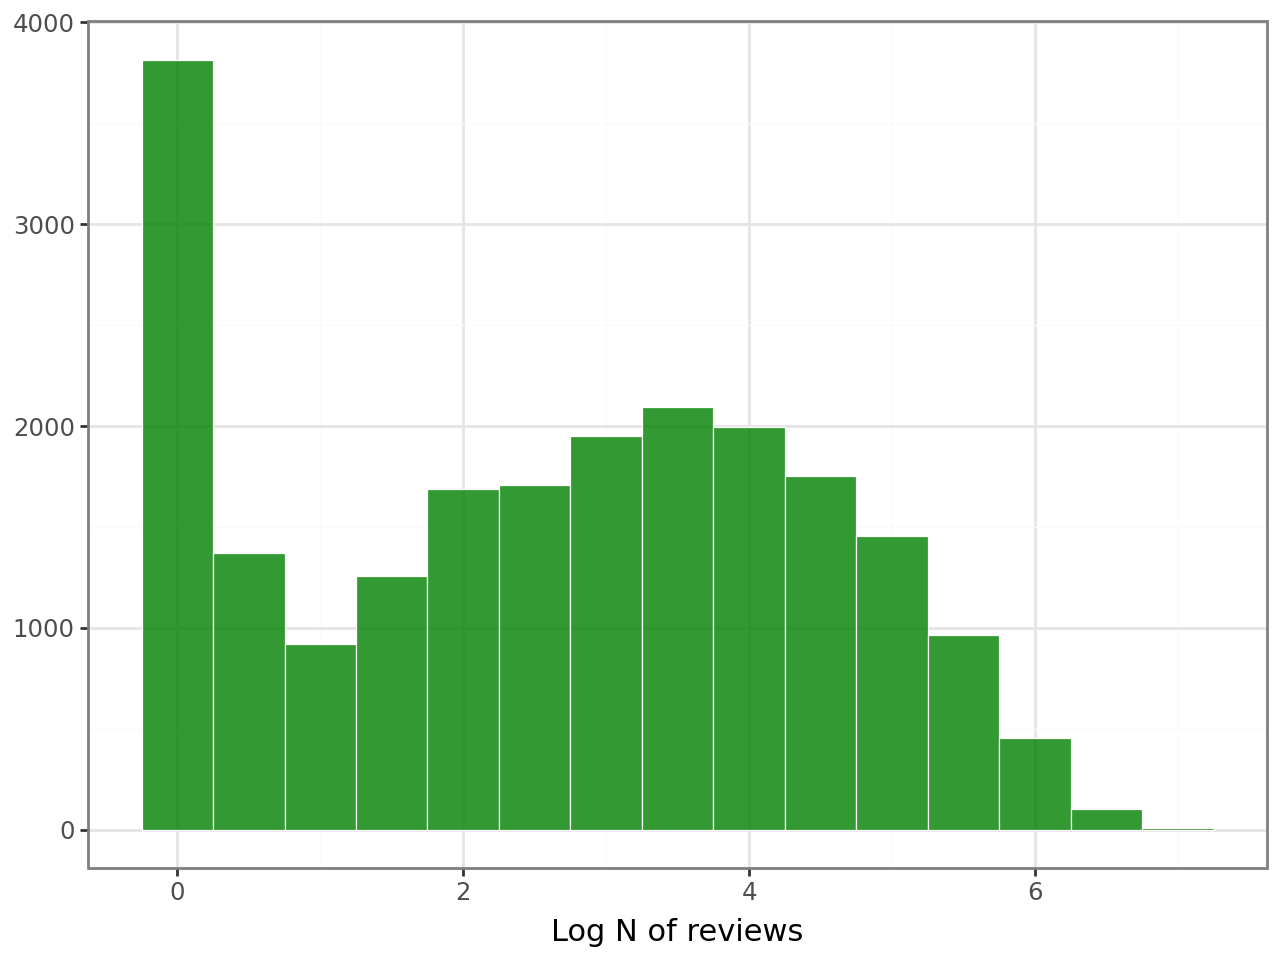

In [60]:
(
    ggplot(data, aes("ln_number_of_reviews"))
    + geom_histogram(binwidth=0.5, fill='green', color="white", alpha=0.8, size=0.25)
    + ylab("")
    + xlab("Log N of reviews")
    + theme_bw()
)


In [61]:
bins = [0,1,51,max(data.n_number_of_reviews)]
labels = [0,1,2]
data["f_number_of_reviews"] = pd.cut(data["n_number_of_reviews"],bins = bins, labels = labels, right = False)

In [62]:
data.groupby("f_number_of_reviews").agg(
    median_price=("price", np.median),
    mean_price=("price", np.mean),
    n=("price", "size"),
)


,median_price,mean_price,n
f_number_of_reviews,,,
0,90.0,127.465128,3814
1,100.0,123.457549,11743
2,106.0,128.071297,5989


In [63]:
# Regression 1: log-price and number of reviews
smf.ols(formula="ln_price ~ f_number_of_reviews", data=data).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     65.46
Date:                Sun, 02 Mar 2025   Prob (F-statistic):           4.53e-29
Time:                        22:41:47   Log-Likelihood:                -23734.
No. Observations:               21546   AIC:                         4.747e+04
Df Residuals:                   21543   BIC:                         4.750e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    4.4608      0.012    378.375      0.000       4.438       4.484
f_number_of_reviews[T.1]     0.1020      0.014      7.516      0.000       0.075       0.129
f_number_of_reviews[T.2]     0.1725      0.015     11.437      0.000       0.143       0.202
==============================================================================
Omnibus:                       11.883   Durbin-Watson:                   1.778
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.850
Skew:                           0.022   Prob(JB):                      0.00162
Kurtosis:                       3.111   Cond. No.                         5.16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
# Regression 2: log-price and log number of reviews
smf.ols(formula="ln_price ~ ln_number_of_reviews", data=data).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     124.1
Date:                Sun, 02 Mar 2025   Prob (F-statistic):           9.68e-29
Time:                        22:41:47   Log-Likelihood:                -23738.
No. Observations:               21547   AIC:                         4.748e+04
Df Residuals:                   21545   BIC:                         4.750e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                4.4843      0.009    513.767      0.000       4.467       4.501
ln_number_of_reviews     0.0305      0.003     11.139      0.000       0.025       0.036
==============================================================================
Omnibus:                       10.521   Durbin-Watson:                   1.779
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.316
Skew:                           0.020   Prob(JB):                      0.00349
Kurtosis:                       3.105   Cond. No.                         5.99
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
## Time since
# Create variables, measuring the time since: squared, cubic, logs
for var in [
    "ln_days_since",
    "ln_days_since2",
    "ln_days_since3",
    "n_days_since2",
    "n_days_since3",
]:
    if var[:2] == "ln":
        try:
            data[var] = np.log(data["n_days_since"]) ** int(var[-1])
        except ValueError:
            data[var] = np.log(data["n_days_since"])
    else:
        data[var] = (data["n_days_since"]) ** int(var[-1])


In [66]:
# Check the effect
lndays_plot = data.loc[(data.price <= 800) & (data.ln_days_since > 2)]


In [67]:
data.n_number_of_reviews.describe()


count    21547.000000
mean        51.244953
std         89.916776
min          0.000000
25%          2.000000
50%         15.000000
75%         59.000000
max       1060.000000
Name: n_number_of_reviews, dtype: float64

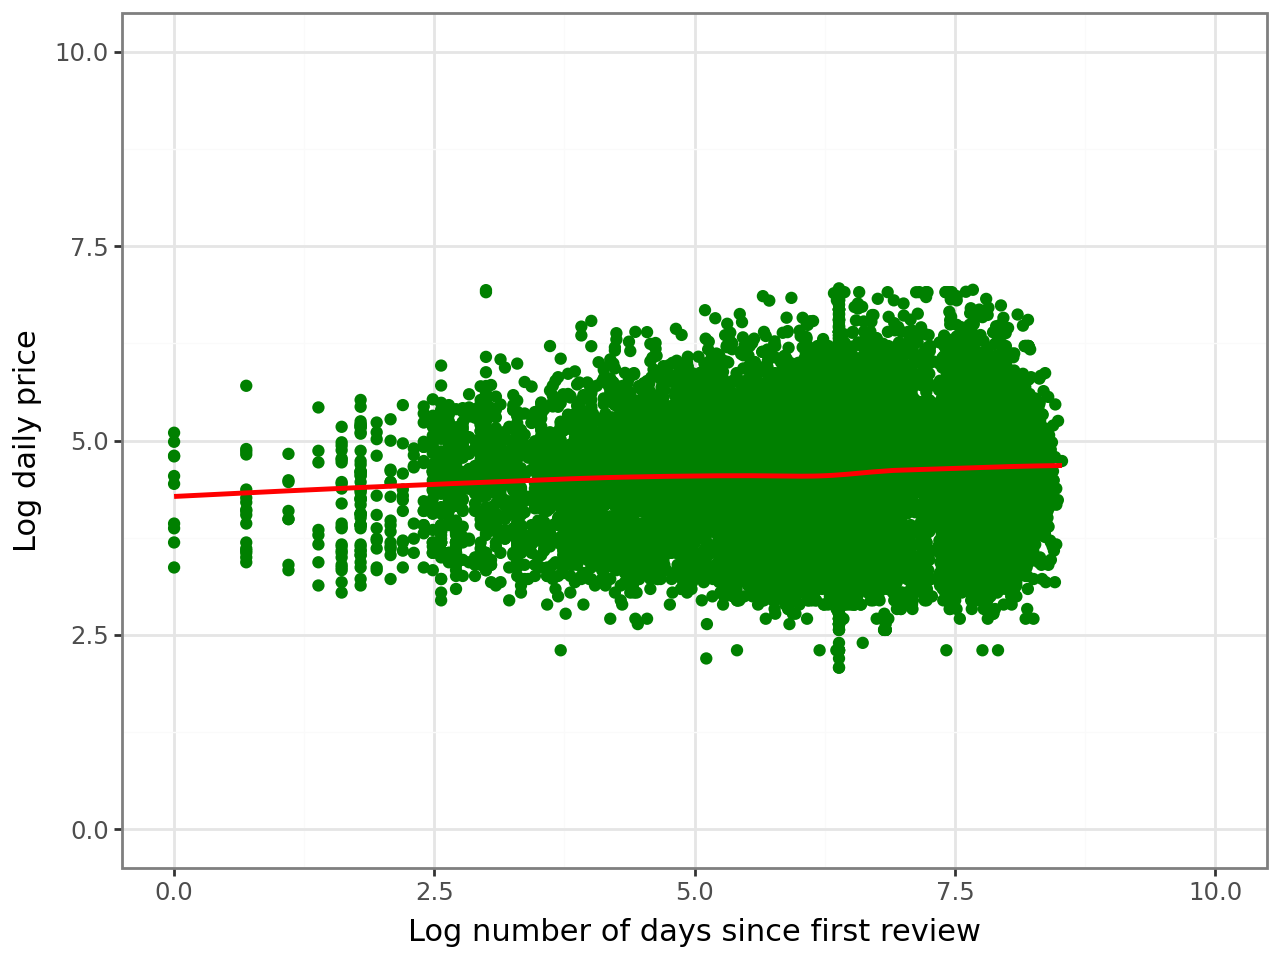

In [68]:
(
    ggplot(data, aes(x="ln_days_since", y="ln_price"))
    + geom_point(size=1.5, colour='green')
    + ylim(0, 10)
    + xlim(0, 10)
    + geom_smooth(method="lowess", colour='red', se=False)
    + labs(x="Log number of days since first review", y="Log daily price")
    + theme_bw()
)


In [69]:
data.n_review_scores_rating.describe()

count    21547.000000
mean         4.678237
std          0.387288
min          1.000000
25%          4.610000
50%          4.760000
75%          4.880000
max          5.000000
Name: n_review_scores_rating, dtype: float64

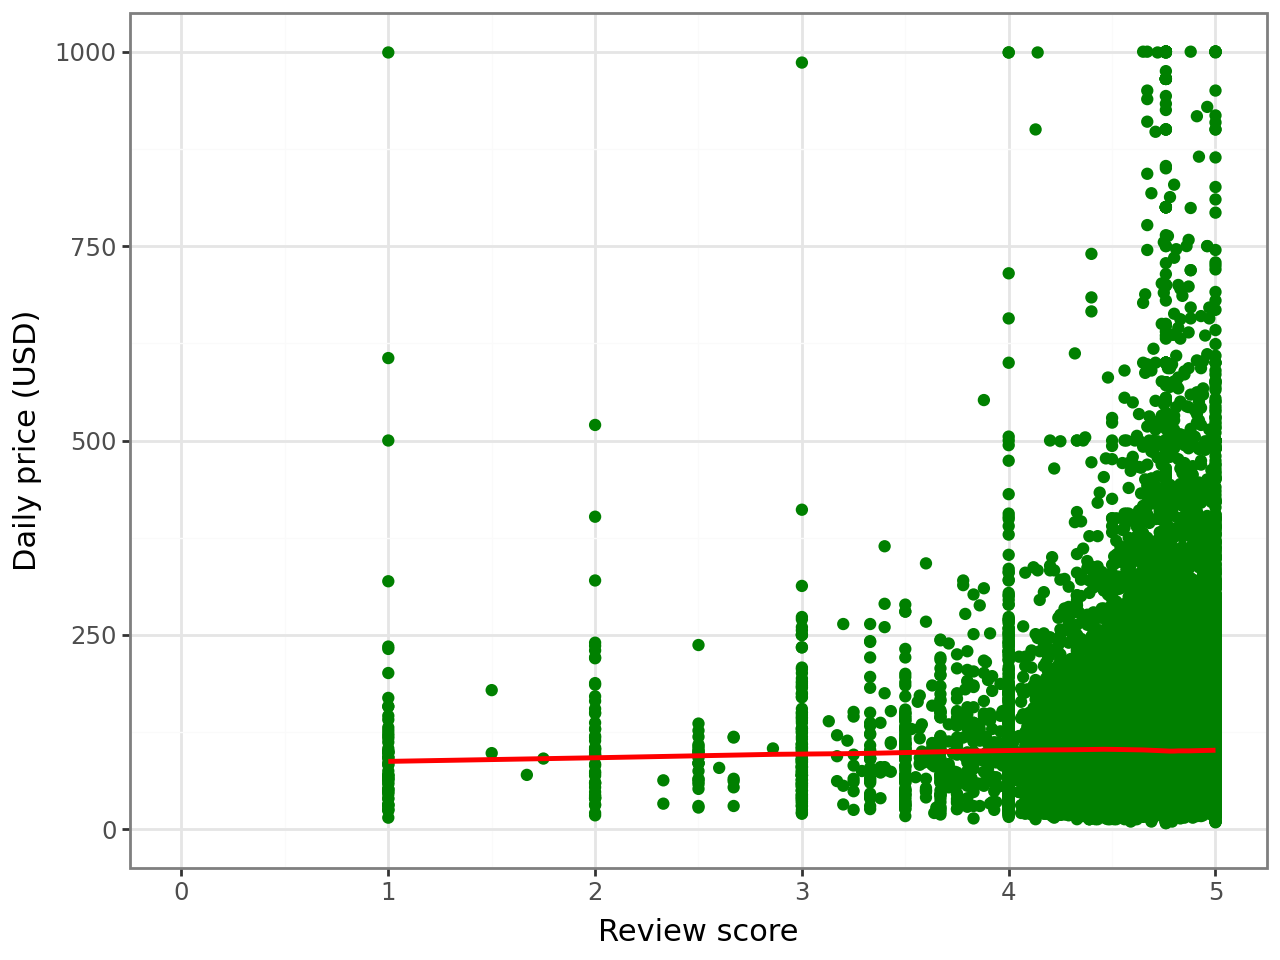

In [70]:
## review score effect
(
    ggplot(data, aes(x="n_review_scores_rating", y="price"))
    + geom_point(size=1.5, colour='green')
    + ylim(0, 1000)
    + xlim(0, 5)
    + geom_smooth(method="lowess", colour='red', se=False)
    + labs(x="Review score", y="Daily price (USD)")
    + theme_bw()
)


In [71]:
data["ln_review_scores_rating"] = np.log(data["n_review_scores_rating"])


In [72]:
# Regression 1) ln price - num of review scores
smf.ols(formula="ln_price ~ n_review_scores_rating", data=data).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.472
Date:                Sun, 02 Mar 2025   Prob (F-statistic):             0.0345
Time:                        22:42:14   Log-Likelihood:                -23798.
No. Observations:               21547   AIC:                         4.760e+04
Df Residuals:                   21545   BIC:                         4.762e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  4.4373      0.060     73.591      0.000       4.319       4.555
n_review_scores_rating     0.0272      0.013      2.115      0.034       0.002       0.052
==============================================================================
Omnibus:                        7.003   Durbin-Watson:                   1.765
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                7.262
Skew:                          -0.024   Prob(JB):                       0.0265
Kurtosis:                       3.076   Cond. No.                         59.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
# Regression 2) ln price - log num of review scores

smf.ols(formula="ln_price ~ ln_review_scores_rating", data=data).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.223
Date:                Sun, 02 Mar 2025   Prob (F-statistic):             0.0399
Time:                        22:42:14   Log-Likelihood:                -23798.
No. Observations:               21547   AIC:                         4.760e+04
Df Residuals:                   21545   BIC:                         4.762e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   4.4292      0.066     67.155      0.000       4.300       4.558
ln_review_scores_rating     0.0879      0.043      2.055      0.040       0.004       0.172
==============================================================================
Omnibus:                        6.968   Durbin-Watson:                   1.766
Prob(Omnibus):                  0.031   Jarque-Bera (JB):                7.241
Skew:                          -0.023   Prob(JB):                       0.0268
Kurtosis:                       3.077   Cond. No.                         29.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
## minimum nights
smf.ols(formula="ln_price ~ n_minimum_nights", data=data).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     191.7
Date:                Sun, 02 Mar 2025   Prob (F-statistic):           2.11e-43
Time:                        22:42:14   Log-Likelihood:                -23705.
No. Observations:               21547   AIC:                         4.741e+04
Df Residuals:                   21545   BIC:                         4.743e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.5879      0.005    875.929      0.000       4.578       4.598
n_minimum_nights    -0.0035      0.000    -13.845      0.000      -0.004      -0.003
==============================================================================
Omnibus:                       17.418   Durbin-Watson:                   1.764
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.805
Skew:                           0.001   Prob(JB):                     5.00e-05
Kurtosis:                       3.149   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
bins = [1,2,3,max(data.n_minimum_nights)]
labels = [1,2,3]
data["f_minimum_nights"] = pd.cut(data["n_minimum_nights"], bins = bins, labels = labels, right = False)

In [76]:
## minimum nights
smf.ols(formula="ln_price ~ f_minimum_nights", data=data).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     143.4
Date:                Sun, 02 Mar 2025   Prob (F-statistic):           1.37e-62
Time:                        22:42:14   Log-Likelihood:                -23657.
No. Observations:               21546   AIC:                         4.732e+04
Df Residuals:                   21543   BIC:                         4.734e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 4.6494      0.008    614.691      0.000       4.635       4.664
f_minimum_nights[T.2]    -0.0751      0.013     -5.578      0.000      -0.102      -0.049
f_minimum_nights[T.3]    -0.1868      0.011    -16.905      0.000      -0.209      -0.165
==============================================================================
Omnibus:                        7.236   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.027   Jarque-Bera (JB):                7.217
Skew:                          -0.042   Prob(JB):                       0.0271
Kurtosis:                       3.032   Cond. No.                         3.51
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
data.groupby("room_type").agg(mean_price=("price", np.mean), n=("price", "size"))


,mean_price,n
room_type,,
Entire home/apt,150.989194,14807
Hotel room,283.189655,58
Private room,66.300893,6381
Shared room,92.332226,301


In [78]:
inf = data.isin([np.inf, -np.inf]).sum()
inf[inf > 0]


ln_beds    2972
dtype: int64

In [79]:
data = data.replace([np.inf, -np.inf], np.nan)


In [80]:
data.isnull().sum().loc[lambda x: x > 0]

ln_beds                2972
f_bathroom                1
f_number_of_reviews       1
f_minimum_nights          1
dtype: int64

In [81]:
data.to_csv("cleaned_data_madrid.csv", index=False)
